# Coding Portion: Fashion Item Classification

* Dataset used: **Fashion MNIST** (28 x 28 grayscale images of fashion items)
* Dataset size: 60,000 training samples, 10,000 test samples
* Dataset source: https://github.com/zalandoresearch/fashion-mnist

#### Classification Labels:
Label | Description
:--- | ---
0 | T-shirt/top
1 | Trouser
2 | Pullover
3 | Dress
4 | Coat
5 | Sandal
6 | Shirt
7 | Sneaker
8 | Bag
9 | Ankle boot

### Step 1: Load in the Data

In [1]:
# Import Fashion-MNIST dataset from 'fashion' folder

from fashion import mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion', kind='t10k')

In [2]:
# Data exploration

print("Inputs shape is " + str(X_train.shape)) # 60,000 flattened image vectors (784 pixels long)
print("Input type is " + str(type(X_train)))
print("Labels:")
print(y_train)
print("Labels shape is" + str(y_train.shape)) # 60,000 labels
print("Labels type is " + str(type(y_train)))

Inputs shape is (60000, 784)
Input type is <class 'numpy.ndarray'>
Labels:
[9 0 0 ... 3 0 5]
Labels shape is(60000,)
Labels type is <class 'numpy.ndarray'>


In [3]:
# Convert numerical label to item description

def to_description(label):
    if label == 0: return "T-shirt/top"
    elif label == 1: return "Trouser"
    elif label == 2: return "Pullover"
    elif label == 3: return "Dress"
    elif label == 4: return "Coat"
    elif label == 5: return "Sandal"
    elif label == 6: return "Shirt"
    elif label == 7: return "Sneaker"
    elif label == 8: return "Bag"
    elif label == 9: return "Ankle boot"
    else: return "Label not found"

Label:  0
Description:  T-shirt/top


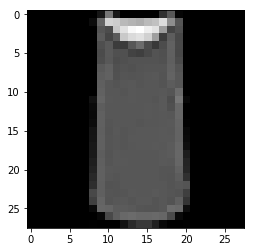

In [4]:
# Visualize the training examples

import matplotlib.pyplot as plt
import numpy as np

def visualize_sample(sample_num):
    flattened_vector = X_train[sample_num] # retrieve flattened vector
    image_2d = np.reshape(flattened_vector, (28, 28)) # reshape to 28 x 28 grayscale image array
    plt.imshow(image_2d, cmap = plt.get_cmap('gray')) # feed image into matplotlib
    print("Label: ", y_train[sample_num]) # print actual label
    print("Description: ", to_description(y_train[sample_num])) # print description
    plt.show()
    
    
visualize_sample(2)

### Step 2: Data Pre-Processing
1. Normalize the feature vectors/pixel values
2. Categorize the outputs

In [5]:
# Normalize the X_train and X_test dataset pixel values to between 0-1

# TODO: fill this in
    # Hint: maximum pixel value is still 255
X_train = X_train / 255
X_test = X_test / 255

In [6]:
import keras

# TODO: Use Keras to categorize the outputs ("one-hot" vectors)
    # Use variable names: y_train_categorical, y_test_categorical
    # hint: use the to_categorical() keras function to do this for you
y_train_categorical = keras.utils.to_categorical(y_train)
y_test_categorical = keras.utils.to_categorical(y_test)

# let's see result of categorizing the outputs
print(y_test_categorical[:5])

Using TensorFlow backend.


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Step 3: Create and Compile Neural Network Model

In [56]:
from keras.layers import Dense, Activation
from keras.models import Sequential

model = Sequential()

# TODO: fill this in
# Feel free to experiment with different number of layers, number of neurons, activation functions, etc.
    # Activation functions: https://keras.io/activations/
    # Declaring Keras layers: https://keras.io/layers/core/
    
### Add 1st layer here. Remember that the input_dimension should match up with the input vector dimension!
model.add(Dense(128, activation="relu", input_shape=(784,)))
model.add(keras.layers.Dropout(rate=0.2))
### Add 2nd layer here.
model.add(Dense(64, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))

model.add(Dense(32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))
# Add final layer here. Make sure the last layer matches up the output vector dimension
    # Hint: use softmax again to output classification probabilities
model.add(Dense(10, activation="softmax"))

In [57]:
import tensorflow as tf
tf.__version__

'1.5.0-rc1'

In [58]:
# TODO: Compile model
    # Loss: categorical cross-entropy
    # Optimizer: stochastic gradient descent
        # Or: experiment with other optimizers? https://keras.io/optimizers/
    # Metrics: accuracy
model.compile(optimizer=keras.optimizers.Adam(amsgrad=True), loss="categorical_crossentropy", metrics=["accuracy"])     

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                330       
Total para

In [60]:
# Import relevant libraries
from keras_tqdm import TQDMNotebookCallback # TQDM: progress bars
from keras.callbacks import TensorBoard # Tensorboard: training plots
    
# Clear any existing Tensorboard logs
import shutil
shutil.rmtree('./logs', ignore_errors=True)

# Set up callback links to refer back to during training
tensorboard = TensorBoard()
callbacks_list = [TQDMNotebookCallback(), tensorboard]

In [62]:
# TODO: Fit model to training data
    # Reserve some fraction of training data as validation data
    # Pick number of epochs
    # Pick a batch_size
    # Pass in relevant callbacks_list from above
num_epoch = 50
model.fit(X_train, y_train_categorical, batch_size=40, epochs=num_epoch, callbacks=callbacks_list, validation_split=0.1)
    
    
    

Train on 54000 samples, validate on 6000 samples


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 1/50
54000/54000 [==============================] - 5s 92us/step - loss: 0.3139 - acc: 0.8891 - val_loss: 0.3293 - val_acc: 0.8845


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 2/50
54000/54000 [==============================] - 4s 79us/step - loss: 0.2850 - acc: 0.8964 - val_loss: 0.3421 - val_acc: 0.8832


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 3/50
54000/54000 [==============================] - 4s 79us/step - loss: 0.2774 - acc: 0.9011 - val_loss: 0.3382 - val_acc: 0.8813


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 4/50
54000/54000 [==============================] - 4s 78us/step - loss: 0.2709 - acc: 0.9020 - val_loss: 0.3370 - val_acc: 0.8815


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 5/50
54000/54000 [==============================] - 5s 86us/step - loss: 0.2693 - acc: 0.9028 - val_loss: 0.3377 - val_acc: 0.8825


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 6/50
54000/54000 [==============================] - 5s 99us/step - loss: 0.2647 - acc: 0.9038 - val_loss: 0.3514 - val_acc: 0.8848


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 7/50
54000/54000 [==============================] - 5s 87us/step - loss: 0.2615 - acc: 0.9058 - val_loss: 0.3348 - val_acc: 0.8865


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 8/50
54000/54000 [==============================] - 5s 92us/step - loss: 0.2599 - acc: 0.9065 - val_loss: 0.3311 - val_acc: 0.8897


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 9/50
54000/54000 [==============================] - 5s 89us/step - loss: 0.2559 - acc: 0.9086 - val_loss: 0.3352 - val_acc: 0.8883


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 10/50
54000/54000 [==============================] - 5s 90us/step - loss: 0.2501 - acc: 0.9092 - val_loss: 0.3372 - val_acc: 0.8893


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 11/50
54000/54000 [==============================] - 5s 95us/step - loss: 0.2513 - acc: 0.9093 - val_loss: 0.3242 - val_acc: 0.8902


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 12/50
54000/54000 [==============================] - 5s 95us/step - loss: 0.2486 - acc: 0.9098 - val_loss: 0.3268 - val_acc: 0.8913


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 13/50
54000/54000 [==============================] - 5s 91us/step - loss: 0.2457 - acc: 0.9109 - val_loss: 0.3479 - val_acc: 0.8932


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 14/50
54000/54000 [==============================] - 5s 90us/step - loss: 0.2444 - acc: 0.9114 - val_loss: 0.3398 - val_acc: 0.8870


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 15/50
54000/54000 [==============================] - 6s 108us/step - loss: 0.2419 - acc: 0.9113 - val_loss: 0.3479 - val_acc: 0.8877


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 16/50
54000/54000 [==============================] - 5s 93us/step - loss: 0.2410 - acc: 0.9136 - val_loss: 0.3238 - val_acc: 0.8905


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 17/50
54000/54000 [==============================] - 5s 92us/step - loss: 0.2400 - acc: 0.9120 - val_loss: 0.3508 - val_acc: 0.8835


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 18/50
54000/54000 [==============================] - 5s 93us/step - loss: 0.2370 - acc: 0.9143 - val_loss: 0.3297 - val_acc: 0.8922


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 19/50
54000/54000 [==============================] - 5s 102us/step - loss: 0.2366 - acc: 0.9149 - val_loss: 0.3461 - val_acc: 0.8912


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 20/50
54000/54000 [==============================] - 5s 97us/step - loss: 0.2332 - acc: 0.9158 - val_loss: 0.3408 - val_acc: 0.8947


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 21/50
54000/54000 [==============================] - 5s 90us/step - loss: 0.2282 - acc: 0.9164 - val_loss: 0.3620 - val_acc: 0.8893


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 22/50
54000/54000 [==============================] - 5s 95us/step - loss: 0.2304 - acc: 0.9170 - val_loss: 0.3363 - val_acc: 0.8880


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 23/50
54000/54000 [==============================] - 4s 80us/step - loss: 0.2262 - acc: 0.9173 - val_loss: 0.3483 - val_acc: 0.8857


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 24/50
54000/54000 [==============================] - 5s 93us/step - loss: 0.2268 - acc: 0.9179 - val_loss: 0.3383 - val_acc: 0.8927


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 25/50
54000/54000 [==============================] - 5s 96us/step - loss: 0.2230 - acc: 0.9192 - val_loss: 0.3474 - val_acc: 0.8892


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 26/50
54000/54000 [==============================] - 5s 92us/step - loss: 0.2235 - acc: 0.9177 - val_loss: 0.3615 - val_acc: 0.8907


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 27/50
54000/54000 [==============================] - 5s 99us/step - loss: 0.2263 - acc: 0.9180 - val_loss: 0.3487 - val_acc: 0.8847


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 28/50
54000/54000 [==============================] - 5s 90us/step - loss: 0.2218 - acc: 0.9192 - val_loss: 0.3284 - val_acc: 0.8920


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 29/50
54000/54000 [==============================] - 5s 84us/step - loss: 0.2259 - acc: 0.9169 - val_loss: 0.3300 - val_acc: 0.8902


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 30/50
54000/54000 [==============================] - 4s 82us/step - loss: 0.2208 - acc: 0.9190 - val_loss: 0.3725 - val_acc: 0.8863


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 31/50
54000/54000 [==============================] - 4s 80us/step - loss: 0.2187 - acc: 0.9215 - val_loss: 0.3612 - val_acc: 0.8862


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 32/50
54000/54000 [==============================] - 4s 79us/step - loss: 0.2239 - acc: 0.9207 - val_loss: 0.3406 - val_acc: 0.8880


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 33/50
54000/54000 [==============================] - 5s 97us/step - loss: 0.2143 - acc: 0.9222 - val_loss: 0.3407 - val_acc: 0.8940


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 34/50
54000/54000 [==============================] - 5s 86us/step - loss: 0.2182 - acc: 0.9216 - val_loss: 0.3524 - val_acc: 0.8907


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 35/50
54000/54000 [==============================] - 5s 102us/step - loss: 0.2140 - acc: 0.9237 - val_loss: 0.3469 - val_acc: 0.8898


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 36/50
54000/54000 [==============================] - 5s 86us/step - loss: 0.2124 - acc: 0.9228 - val_loss: 0.3468 - val_acc: 0.8883


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 37/50
54000/54000 [==============================] - 4s 80us/step - loss: 0.2109 - acc: 0.9223 - val_loss: 0.3575 - val_acc: 0.8887


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 38/50
54000/54000 [==============================] - 5s 87us/step - loss: 0.2150 - acc: 0.9233 - val_loss: 0.3416 - val_acc: 0.8912


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 39/50
54000/54000 [==============================] - 5s 95us/step - loss: 0.2105 - acc: 0.9238 - val_loss: 0.3598 - val_acc: 0.8922


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 40/50
54000/54000 [==============================] - 5s 98us/step - loss: 0.2106 - acc: 0.9232 - val_loss: 0.3391 - val_acc: 0.8935


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 41/50
54000/54000 [==============================] - 5s 85us/step - loss: 0.2085 - acc: 0.9243 - val_loss: 0.3606 - val_acc: 0.8907


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 42/50
54000/54000 [==============================] - 5s 97us/step - loss: 0.2106 - acc: 0.9239 - val_loss: 0.3654 - val_acc: 0.8853


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 43/50
54000/54000 [==============================] - 5s 92us/step - loss: 0.2068 - acc: 0.9258 - val_loss: 0.3632 - val_acc: 0.8890


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 44/50
54000/54000 [==============================] - 5s 93us/step - loss: 0.2064 - acc: 0.9245 - val_loss: 0.3679 - val_acc: 0.8922


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 45/50
54000/54000 [==============================] - 6s 107us/step - loss: 0.2065 - acc: 0.9245 - val_loss: 0.3573 - val_acc: 0.8920


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 46/50
54000/54000 [==============================] - 5s 86us/step - loss: 0.2017 - acc: 0.9269 - val_loss: 0.3646 - val_acc: 0.8887


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 47/50
54000/54000 [==============================] - 6s 104us/step - loss: 0.2057 - acc: 0.9257 - val_loss: 0.3659 - val_acc: 0.8897


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 48/50
54000/54000 [==============================] - 5s 90us/step - loss: 0.2006 - acc: 0.9262 - val_loss: 0.3676 - val_acc: 0.8880


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 49/50
54000/54000 [==============================] - 5s 95us/step - loss: 0.2037 - acc: 0.9254 - val_loss: 0.3669 - val_acc: 0.8897


Widget Javascript not detected.  It may not be installed or enabled properly.


Epoch 50/50
54000/54000 [==============================] - 5s 87us/step - loss: 0.2011 - acc: 0.9276 - val_loss: 0.3530 - val_acc: 0.8942


### Step 4: Evaluate the Model

In [63]:
# TODO: Evaluate model on test data
model.evaluate(X_test, y_test_categorical)
# Use model.evaluate()
# Also: open up the training logs in Tensorboard to check validation_loss for overfitting
loss_and_metrics = model.evaluate(X_test, y_test_categorical, batch_size=128)

print(loss_and_metrics)

10000/10000 [==============================] - 0s 12us/step
[0.36872273967266084, 0.8895]


In [64]:
# Final predictions testing

import numpy as np

# Compare actual class to predicted class
def visualize_test_sample(test_sample_num):
    
    # Display actual image & label
    flattened_vector = X_test[test_sample_num] # retrieve flattened vector
    image_2d = np.reshape(flattened_vector, (28, 28)) # reshape to 28 x 28 grayscale image array
    plt.imshow(image_2d, cmap = plt.get_cmap('gray')) # feed image into matplotlib
    print("Actual Label: ", y_test[test_sample_num]) # print actual label
    print("Actual Description: ", to_description(y_test[test_sample_num])) # print description
    plt.show()
    
    # Print predicted label
    test_sample = np.expand_dims(X_test[test_sample_num], axis=0) # pick out a one-sample "batch" to feed into model
    predicted_scores = model.predict(test_sample) # outputted probabilities vector
    print("Outputted scores: ", predicted_scores) # print predicted scores

    predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
    print("Predicted Label: ", predicted_class) # print predicted classification
    print("Predicted Description: ", to_description(predicted_class)) # print predicted label description

Actual Label:  2
Actual Description:  Pullover


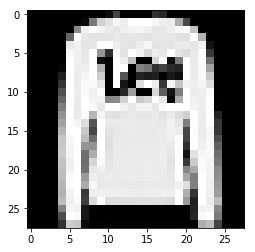

Outputted scores:  [[1.27168448e-06 2.14432864e-11 9.99879241e-01 5.49874729e-12
  1.70829771e-05 5.11745113e-17 1.02337486e-04 3.21427220e-21
  1.26103060e-11 1.03212450e-19]]
Predicted Label:  2
Predicted Description:  Pullover


In [65]:
visualize_test_sample(1
                     )